In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### READ MODEL DATA

In [2]:
year = 2021

path = "/Users/pastudilloe/Desktop/PNUD DATA - Products/New_DATA/"


In [3]:
predicted_out = pd.read_csv(path + 'Results/PAI_%s_Predicted.csv' %(year), sep = ',')
predicted_out = predicted_out.iloc[: , 1:]

data = pd.read_csv(path + 'PAI_Filtrado/PAI_%s.csv' %(year), sep = ',')
data.columns = ['Entidad', 'Proyecto', 'Fuente', 'Codificado', 'Devengado', 'Periodo']

In [4]:
data

,Entidad,Proyecto,Fuente,Codificado,Devengado,Periodo
0,996 - INGRESOS Y TRANSFERENCIAS,002 - PROGRAMA DE INVERSION ECUADOR ESTRATEGI...,202 - Prestamos Externos,6.305537e+06,0.000000e+00,2021
1,996 - INGRESOS Y TRANSFERENCIAS,004 - EXPLORACION AVANZADA DEL AREA MINERA PA...,202 - Prestamos Externos,1.529040e+05,0.000000e+00,2021
2,996 - INGRESOS Y TRANSFERENCIAS,005 - ESTUDIO DE PROSPECCION Y EXPLORACION Y ...,202 - Prestamos Externos,1.428156e+06,0.000000e+00,2021
3,996 - INGRESOS Y TRANSFERENCIAS,007 - PROYECTO DE PREFACTIBILIDAD MINERA DEL ...,202 - Prestamos Externos,6.471600e+04,0.000000e+00,2021
4,996 - INGRESOS Y TRANSFERENCIAS,013 - PROGRAMA DE INVERSION ECUADOR ESTRATEGI...,006 - RECURSOS PROVENIENTES DE LA LEY ORGANICA...,1.539835e+07,0.000000e+00,2021
...,...,...,...,...,...,...
1608,643 - DEFENSORIA DEL PUEBLO,004 - SISTEMA INTEGRAL DE PREVENCION PROTECC...,998 - ANTICIPOS DE EJERCICIOS ANTERIORES,5.796197e+04,0.000000e+00,2021
1609,643 - DEFENSORIA DEL PUEBLO,005 - PROGRAMA DE REFORMA INSTITUCIONAL DE LA...,202 - Prestamos Externos,4.163925e+05,3.697825e+05,2021
1610,643 - DEFENSORIA DEL PUEBLO,005 - PROGRAMA DE REFORMA INSTITUCIONAL DE LA...,301 - Colocaciones Internas,0.000000e+00,0.000000e+00,2021
1611,916 - SUPERINTENDENCIA DE ECONOMIA POPULAR Y S...,001 - PROGRAMA DE REFORMA INSTITUCIONAL DE LA...,202 - Prestamos Externos,8.007451e+05,0.000000e+00,2021


In [5]:
data = data.dropna()

data['cod_ENT'] = data.Entidad.astype(str).str[:3]
data['cod_PROY'] = data.Proyecto.astype(str).str[:3]
data['cod_FUENT'] = data.Fuente.astype(str).str[:3]

/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1766344448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cod_ENT'] = data.Entidad.astype(str).str[:3]
/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1766344448.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cod_PROY'] = data.Proyecto.astype(str).str[:3]
/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1766344448.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [6]:
data['Entidad'] = data['Entidad'].str.replace('\d+', '')
data['Entidad'] = data['Entidad'].str.replace('-', '')

data['Proyecto'] = data['Proyecto'].str.replace('\d+', '')
data['Proyecto'] = data['Proyecto'].str.replace('-', '')

data['Fuente'] = data['Fuente'].str.replace('\d+', '')
data['Fuente'] = data['Fuente'].str.replace('-', '')

/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/3064619390.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Entidad'] = data['Entidad'].str.replace('\d+', '')
/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/3064619390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Entidad'] = data['Entidad'].str.replace('\d+', '')
/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/3064619390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [7]:
data['unique_code'] = data['cod_ENT'] + "-" + data['cod_PROY'] + "-" + data['cod_FUENT']
data_1 = data[['unique_code', 'Entidad', 'Proyecto', 'Fuente', 'Codificado', 'Devengado']]
data_1['Fuente'] = data_1['Fuente'].str.title()

/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/2529286401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['unique_code'] = data['cod_ENT'] + "-" + data['cod_PROY'] + "-" + data['cod_FUENT']
/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/2529286401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['Fuente'] = data_1['Fuente'].str.title()


In [8]:
predicted_out.shape

(759, 6)

In [9]:
predicted_out1 = predicted_out[['unique_code', 'BestOpt_Label', 'BestOpt_value']]
predicted_out1 = predicted_out1[predicted_out1.BestOpt_value >= 0.40]
predicted_out1.shape

(338, 3)

In [10]:
data_2 = pd.merge(data_1, predicted_out1, how='left', on='unique_code')

data_2 = data_2[data_2["Entidad"].str.contains("DEUDA PUBLICA") == False]
data_2 = data_2[data_2["Entidad"].str.contains("INGRESOS Y TRANSFERENCIAS") == False]

data_2['Entidad'] = data_2['Entidad'].str.replace('MINISTERIO DE', '')
data_2['Entidad'] = data_2['Entidad'].str.replace('SECRETARIA TECNICA DE LA', '')
data_2['Entidad'] = data_2['Entidad'].str.replace('SECRETARIA DE LA', '')
data_2['Entidad'] = data_2['Entidad'].str.replace('SECRETARIA DE', '')
data_2['Entidad'] = data_2['Entidad'].str.replace('SERVICIO NACIONAL DE ATENCION INTEGRAL A ', '')
data_2['Entidad'] = data_2['Entidad'].str.replace('A ADOLESCENTES', '')

# GENERAL - Unique projects

In [11]:
data_2['unique_code'].nunique()

1410

In [56]:
data_2a = data_2.groupby(['Entidad']).agg({'Codificado':'sum', 'Devengado':'sum'}).reset_index()

data_2a['codif - deveng'] = data_2a['Codificado'] - data_2a['Devengado']
data_2a['% ejecutado'] = (data_2a['Devengado'] * 100 /  data_2a['Codificado']).round(2)

In [57]:
data_2a = data_2a.sort_values(by='Codificado', ascending = False)
data_2a['Codificado'] = (data_2a['Codificado'] / 1000000).round(1)
data_2a_top = data_2a.head(15)

/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1621135593.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


Text(0.5, 0, 'Millones de Dólares (USD)')

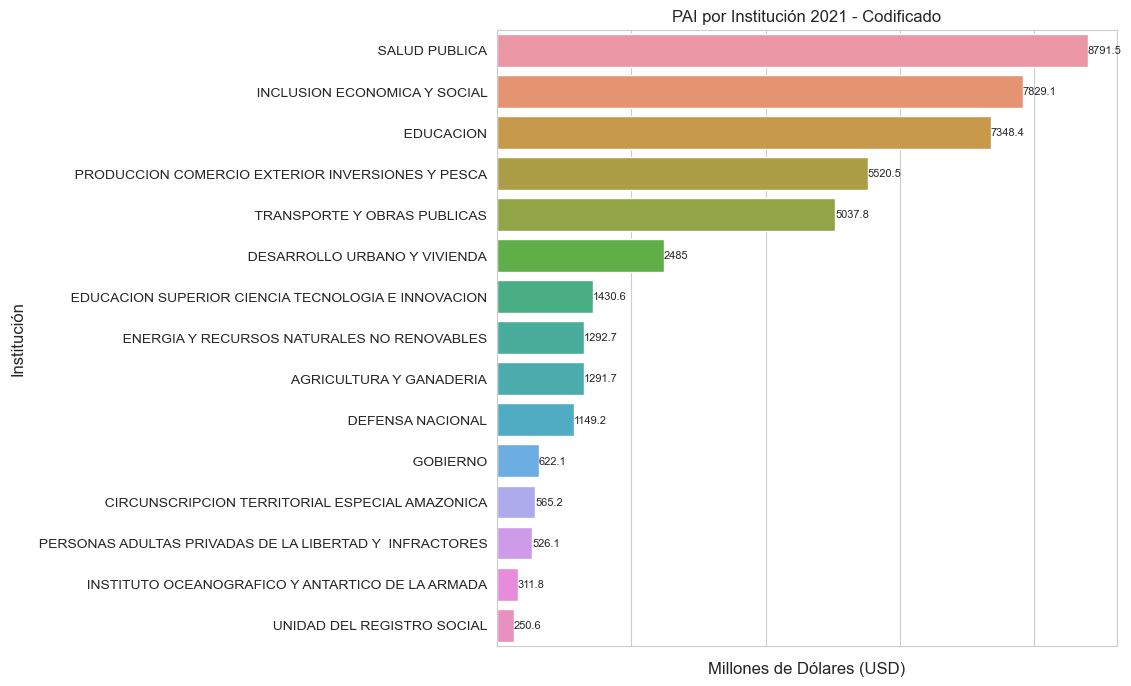

In [58]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='Codificado', y='Entidad', data=data_2a_top)

for i in ax.containers:
    ax.bar_label(i,size=8)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("PAI por Institución %s - Codificado" % (year))

ax.set_ylabel("Institución", fontsize = 12)
ax.set_xlabel("Millones de Dólares (USD)", fontsize = 12)

#plt.legend(loc='upper right')

/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/2377844209.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


Text(0.5, 0, 'Millones de Dólares (USD)')

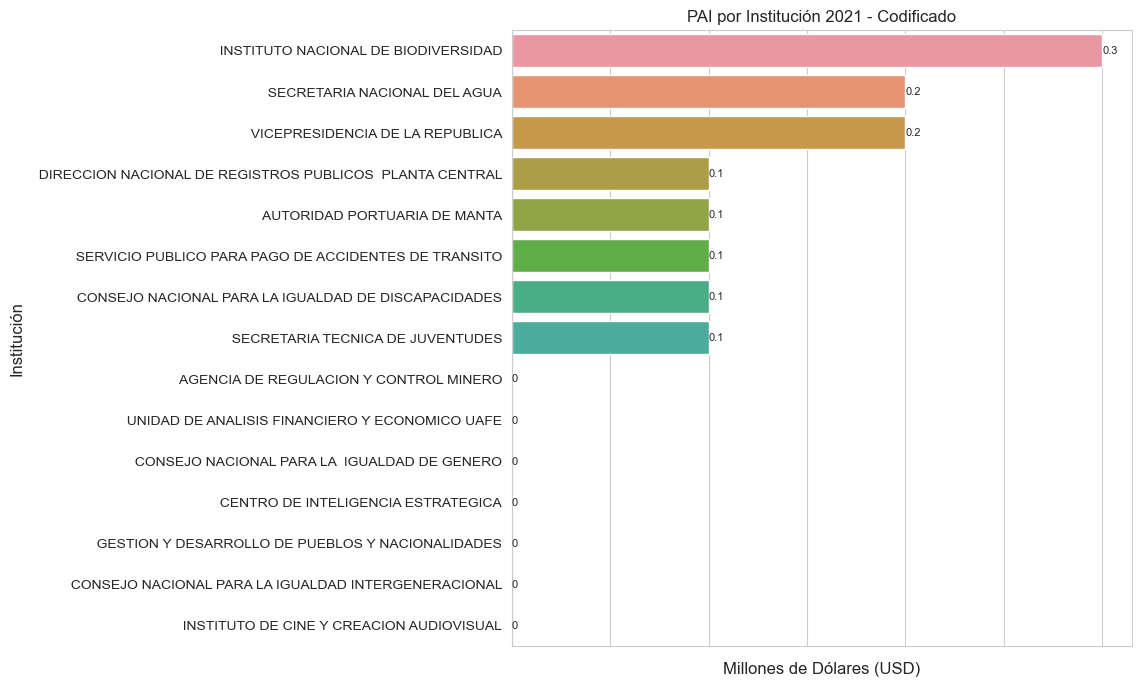

In [59]:
plt.rcParams['figure.figsize'] = [8, 8]

ax = sns.barplot(x='Codificado', y='Entidad', data=data_2a_bottom)

for i in ax.containers:
    ax.bar_label(i,size=8)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("PAI por Institución %s - Codificado" % (year))

ax.set_ylabel("Institución", fontsize = 12)
ax.set_xlabel("Millones de Dólares (USD)", fontsize = 12)

#plt.legend(loc='upper right')

In [16]:
data_2b = data_2a.sort_values(by='Devengado', ascending = False)
data_2b['Devengado'] = (data_2b['Devengado'] / 1000000).round(2)
data_2b_top = data_2b.head(15)
data_2b_bottom = data_2b.tail(15)

/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/390230322.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


Text(0.5, 0, 'Millones de Dólares (USD)')

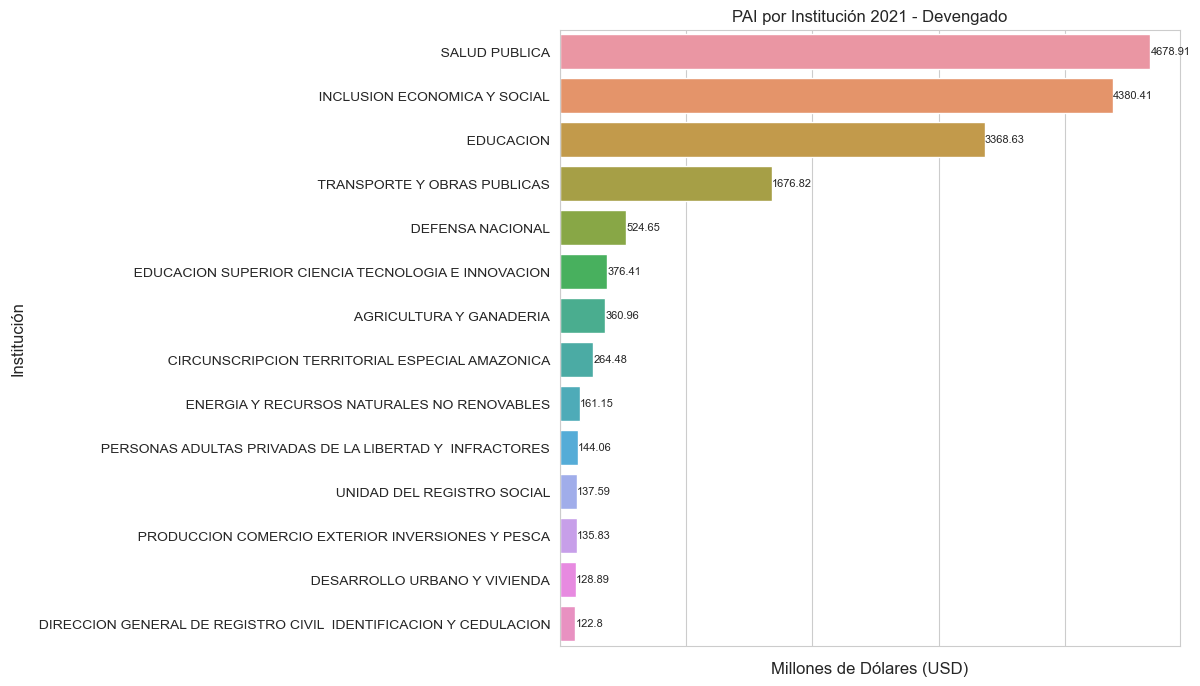

In [17]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='Devengado', y='Entidad', data=data_2b_top)

for i in ax.containers:
    ax.bar_label(i,size=8)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("PAI por Institución %s - Devengado" % (year))

ax.set_ylabel("Institución", fontsize = 12)
ax.set_xlabel("Millones de Dólares (USD)", fontsize = 12)

In [18]:
data_2c = data_2a.sort_values(by='% ejecutado', ascending = False)
data_2c['% ejecutado'] = (data_2c['% ejecutado']).round(2)
data_2c_top = data_2c.head(15)
data_2c_bottom = data_2c.tail(15)

/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/2968911179.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


Text(0.5, 0, 'Porcentaje (%)')

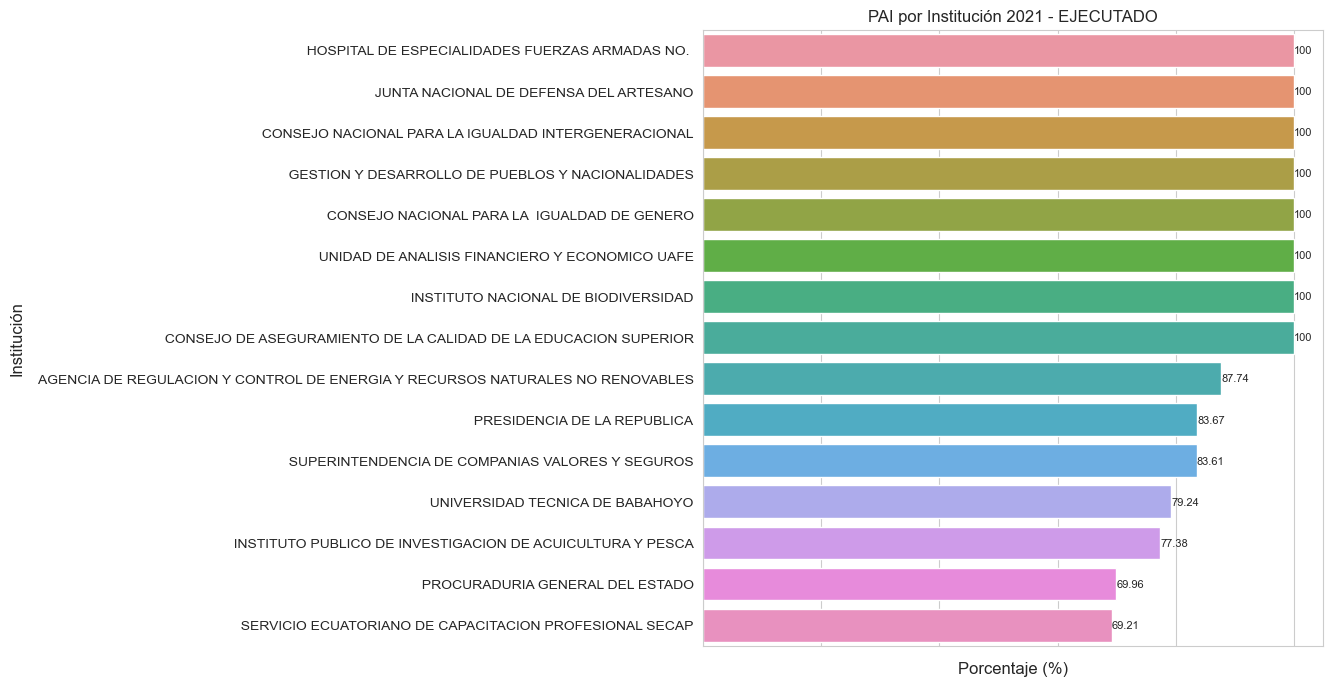

In [19]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='% ejecutado', y='Entidad', data=data_2c_top)

for i in ax.containers:
    ax.bar_label(i,size=8)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title("PAI por Institución %s - EJECUTADO" % (year))

ax.set_ylabel("Institución", fontsize = 12)
ax.set_xlabel("Porcentaje (%)", fontsize = 12)

## FuenteS

In [20]:
data_2f = data_2.groupby(['Fuente']).agg({'Codificado':'sum', 'Devengado':'sum'}).reset_index()

data_2f = pd.melt(data_2f, id_vars=['Fuente'], value_vars=['Codificado', 'Devengado'])
data_2f['value'] = data_2f['value']/1000000
data_2f['Percent'] = (data_2f['value'] * 100 / data_2f.groupby('variable')['value'].transform('sum')).round(1)
data_2f = data_2f.sort_values(by='value', ascending = False)

In [69]:
print(data_2f.Fuente.unique())


['  Prestamos Externos' '  Colocaciones Internas'
 '  Anticipos De Ejercicios Anteriores'
 '  Recursos Provenientes De Preasignaciones'
 '  Recursos Provenientes De La Ley Organica De Solidaridad'
 '  Asistencia Técnica Y Donaciones' '  Colocaciones Externas'
 '  Recursos Fiscales Generados Por Las Instituciones'
 '  Recursos Fiscales' '  Préstamos Internos']


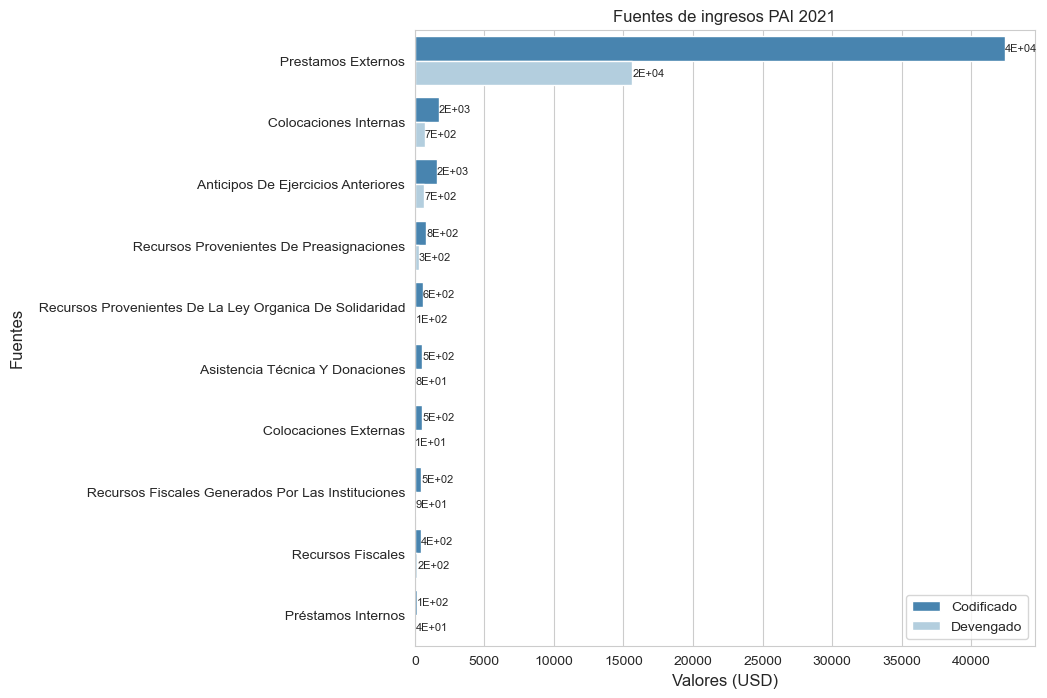

In [21]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_2f, palette = "Blues_r")

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_title("Fuentes de ingresos PAI %s" % (year))
ax.set_ylabel("Fuentes", fontsize = 12)
ax.set_xlabel("Valores (USD)", fontsize = 12)

legend = ax.legend(loc='lower right')



# Unique projects that are aligned with a ODS

In [22]:
data_3 = data_2.dropna(subset=['BestOpt_Label'])
data_3.shape

(443, 8)

In [23]:
data_3 = data_2
data_3[['BestOpt_Label']] = data_3[['BestOpt_Label']].fillna('N/A')
data_3a = data_3.groupby(['Entidad', 'BestOpt_Label']).agg({'Codificado':'sum', 'Devengado':'sum'}).reset_index()

data_3a['Meta'] = data_3a['BestOpt_Label'].str.split(' ').str[0]
data_3a['Obj'] = data_3a['Meta'].str.split('.').str[0]

In [24]:
data_3b = data_3a.groupby(['Entidad', 'Obj']).agg({'Codificado':'sum', 'Devengado':'sum'}).reset_index()

data_3b['ODS_Codif'] = (data_3b['Codificado'] * 100 / data_3b.groupby('Entidad')['Codificado'].transform('sum')).round(1)
data_3b['ODS_Dev'] = (data_3b['Devengado'] *100 / data_3b.groupby('Entidad')['Devengado'].transform('sum')).round(1)
data_3b['Total_Codif'] = data_3b.groupby('Entidad')['Codificado'].transform('sum')

data_3b = data_3b.sort_values(by='Total_Codif', ascending = False)

data_3b_top = data_3b.head(20)
data_3b_bottom = data_3b.tail(15)

In [25]:
data_3c = data_3b
data_3c['ODS'] = np.where(data_3c['Obj']== 'N/A', 'No ODS', 'ODS')

data_3c = data_3c.groupby(['Entidad', 'ODS']).agg({'Codificado':'sum', 'Devengado':'sum'}).reset_index()

data_3c['ODS_Codif'] = (data_3c['Codificado'] * 100 / data_3c.groupby('Entidad')['Codificado'].transform('sum')).round(1)
data_3c['ODS_Dev'] = (data_3c['Devengado'] *100 / data_3c.groupby('Entidad')['Devengado'].transform('sum')).round(1)
data_3c['Total_Codif'] = data_3c.groupby('Entidad')['Codificado'].transform('sum')


data_3c = data_3c.sort_values(by='Total_Codif', ascending = False)

data_3c_top = data_3c.head(20)
data_3c_bottom = data_3c.tail(15)

/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1487892924.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


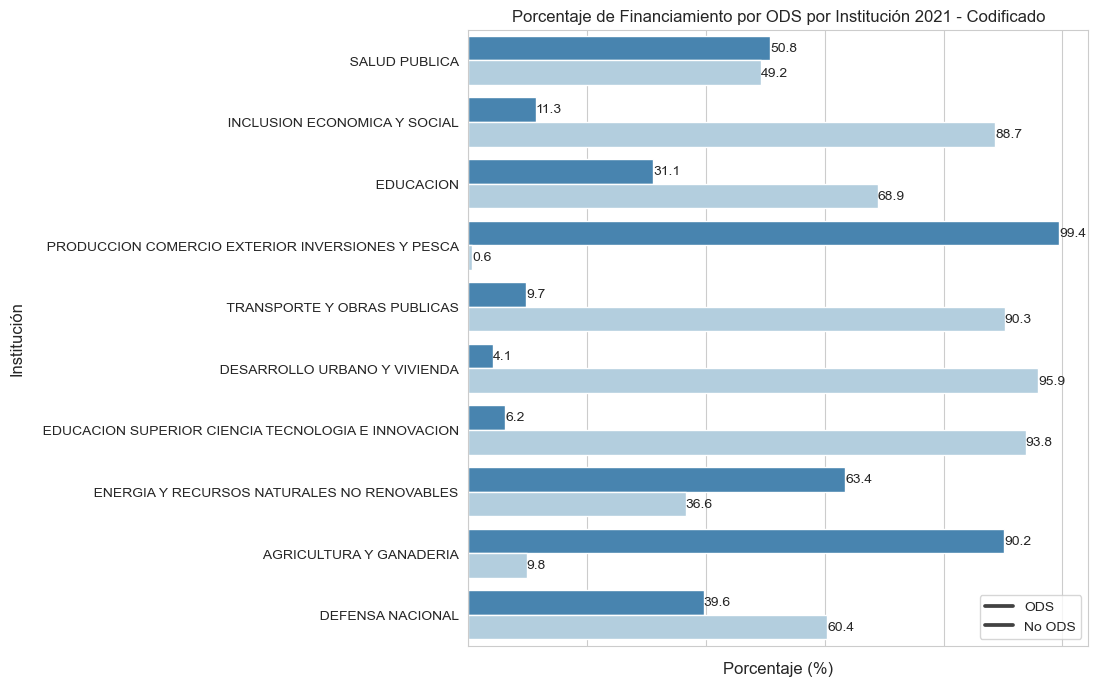

In [26]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='ODS_Codif', y='Entidad', hue ='ODS', data=data_3c_top, palette = "Blues_r")

for i in ax.containers:
    ax.bar_label(i,size=10)

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Porcentaje de Financiamiento por ODS por Institución %s - Codificado" % (year))

ax.set_ylabel("Institución", fontsize = 12)
ax.set_xlabel("Porcentaje (%)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['ODS', 'No ODS'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1306908279.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


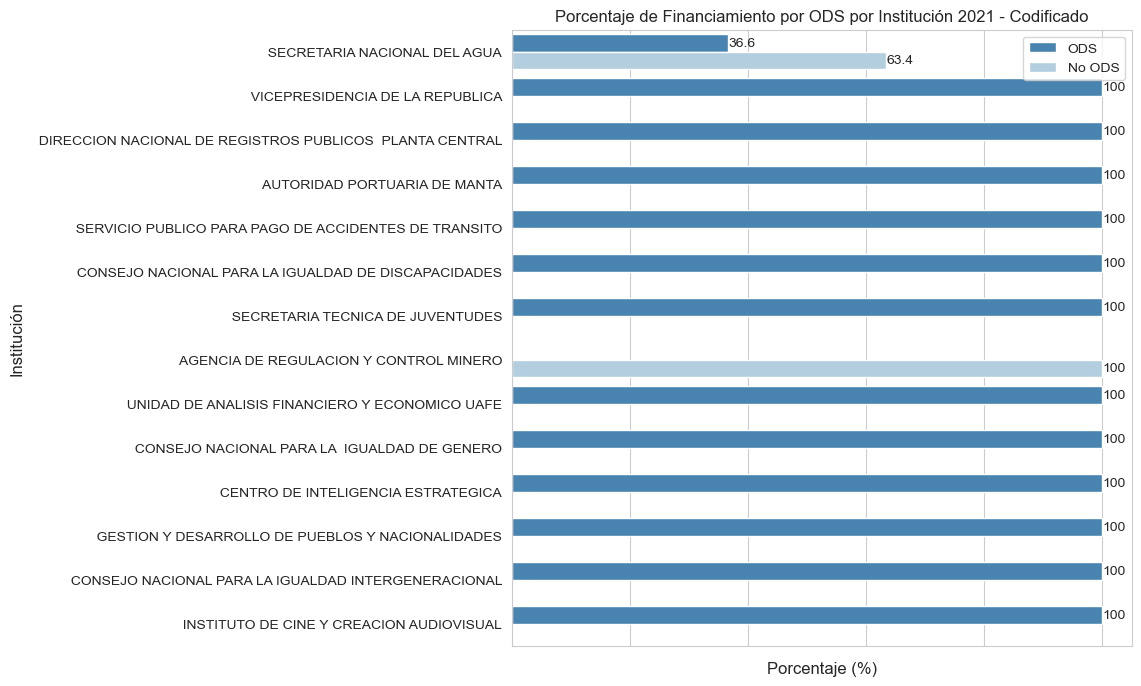

In [27]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='ODS_Codif', y='Entidad', hue ='ODS', data=data_3c_bottom, palette = "Blues_r")

for i in ax.containers:
    ax.bar_label(i,size=10)

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Porcentaje de Financiamiento por ODS por Institución %s - Codificado" % (year))

ax.set_ylabel("Institución", fontsize = 12)
ax.set_xlabel("Porcentaje (%)", fontsize = 12)

legend = ax.legend()
legend.texts[0].set_text("ODS")
legend.texts[1].set_text("No ODS")


# Just ODS

In [60]:
data_4 = data_2

data_4[['BestOpt_Label']] = data_4[['BestOpt_Label']].fillna('N/A')
data_4['Meta'] = data_4['BestOpt_Label'].str.split(' ').str[0]
data_4['Obj'] = data_4['Meta'].str.split('.').str[0]

data_4['ODS'] = np.where(data_4['Obj']== 'N/A', 'No ODS', 'ODS')

In [61]:
data_4a = data_4.groupby(['ODS']).agg({'Codificado':'sum', 'Devengado':'sum'}).reset_index()

data_4a['percent_cod'] = ((data_4a['Codificado'] / data_4a['Codificado'].sum()) * 100).round(2)
data_4a['percent_dev'] = ((data_4a['Devengado'] / data_4a['Devengado'].sum()) * 100).round(2)

In [62]:
data_4b = data_4.groupby(['Obj', 'Meta', 'BestOpt_Label']).agg({'Codificado':'sum', 'Devengado':'sum', 'unique_code':'count'}).reset_index()
data_4b = data_4b.loc[data_4b['BestOpt_Label'] != 'N/A']

data_4b_ = data_4b.groupby(['Obj']).agg({'Codificado':'sum', 'Devengado':'sum', 'unique_code':'sum'}).reset_index()

data_4b_['percent_cod'] = ((data_4b_['Codificado'] / data_4b_['Codificado'].sum()) * 100).round(2)
data_4b_['percent_dev'] = ((data_4b_['Devengado'] / data_4b_['Devengado'].sum()) * 100).round(2)
data_4b_['percent_proy'] = ((data_4b_['unique_code'] / data_4b_['unique_code'].sum()) * 100).round(2)

data_4b_ = data_4b_.sort_values(by="percent_cod", ascending = False)

In [63]:

ODS_names = {
    'Obj' : ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17"],
    'name' : ["Fin a la pobreza", 
    "Hambre cero",
    "Salud y bienestar",
    "Educación de calidad",
    "Igualdad de género",
    "Agua limpia y saneamiento",
    "Energía asequible y no contaminante", 
    "Trabajo decente y crecimiento económico", 
    "Industria, innovación e infraestructura", 
    "Reducción de las desigualdades", 
    "Ciudades y comunidades sostenibles", 
    "Producción y consumo sostenibles", 
    "Acción por el clima", 
    "Vida submarina", 
    "Vida de ecosistemas terrestres",
    "Paz, justicia e instituciones sólidas",
    "Alianzas para lograr los objetivos"]}
  
# creating a Dataframe object 
ODS_names = pd.DataFrame(ODS_names)

In [64]:
data_4b_ = pd.merge(data_4b_, ODS_names, how='left', on='Obj')
data_4b_['Obj'] = data_4b_['Obj'].astype('int')
data_4b_ = data_4b_.sort_values(by='Obj')

In [65]:
data_4b_.head()

,Obj,Codificado,Devengado,unique_code,percent_cod,percent_dev,percent_proy,name
2,1,2.829688e+09,9.440593e+08,45,15.53,20.88,10.16,Fin a la pobreza
4,2,2.381842e+09,9.190759e+08,44,13.07,20.33,9.93,Hambre cero
9,3,1.789671e+08,5.055101e+07,15,0.98,1.12,3.39,Salud y bienestar
0,4,3.058355e+09,7.826174e+08,137,16.79,17.31,30.93,Educación de calidad
11,5,1.676145e+07,4.917497e+06,3,0.09,0.11,0.68,Igualdad de género


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/2084371263.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


Text(0.5, 0, 'Valor (USD)')

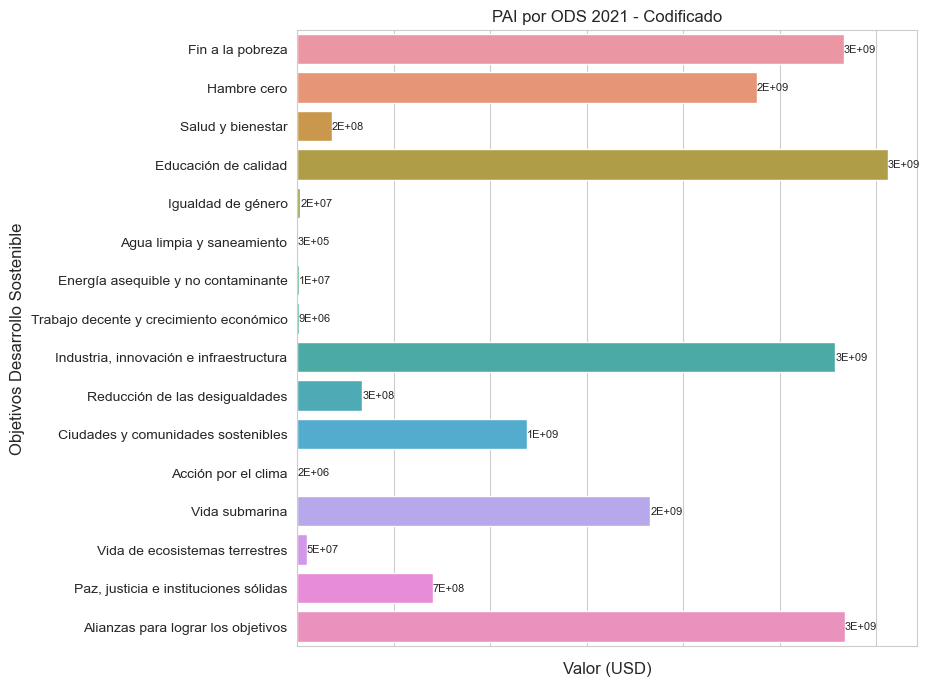

In [66]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='Codificado', y='name', data=data_4b_)

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("PAI por ODS %s - Codificado" % (year))

ax.set_ylabel("Objetivos Desarrollo Sostenible", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

#legend = ax.legend()
#legend.texts[0].set_text("ODS")
#legend.texts[1].set_text("No ODS")


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/4193822941.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


Text(0.5, 0, 'Porcentaje(%)')

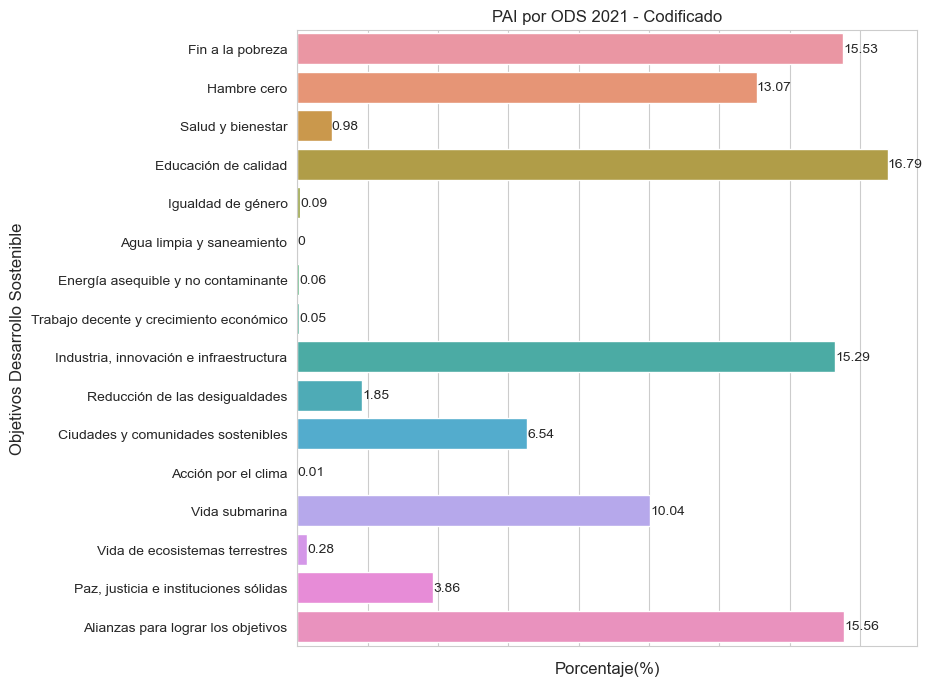

In [35]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='percent_cod', y='name', data=data_4b_)

for i in ax.containers:
    ax.bar_label(i,size=10)

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("PAI por ODS %s - Codificado" % (year))

ax.set_ylabel("Objetivos Desarrollo Sostenible", fontsize = 12)
ax.set_xlabel("Porcentaje(%)", fontsize = 12)

#legend = ax.legend()
#legend.texts[0].set_text("ODS")
#legend.texts[1].set_text("No ODS")


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1054626985.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


Text(0.5, 0, 'Valor (USD)')

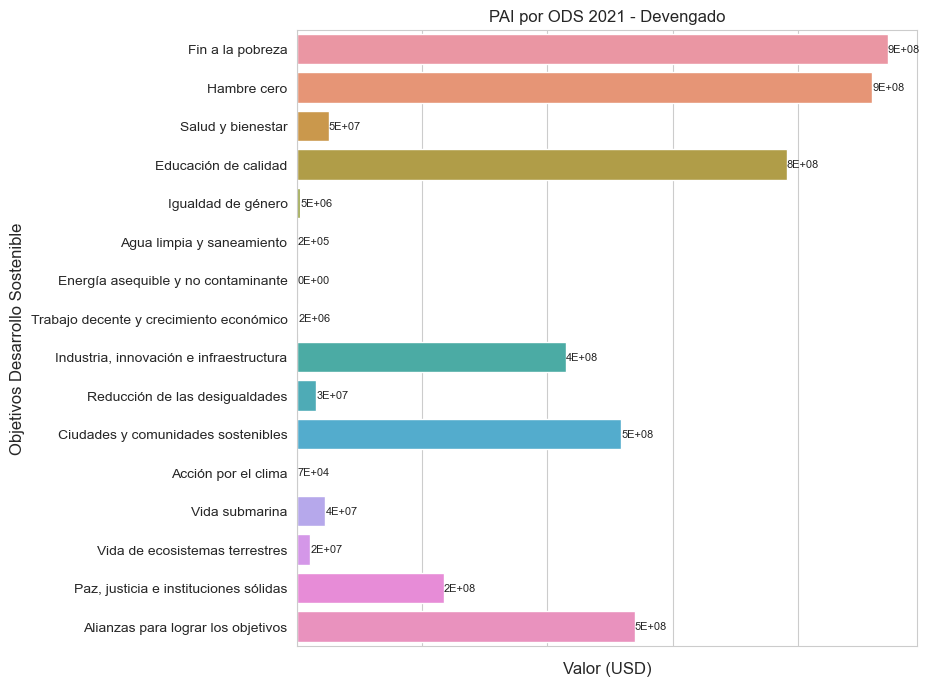

In [36]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='Devengado', y='name', data=data_4b_)

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("PAI por ODS %s - Devengado" % (year))

ax.set_ylabel("Objetivos Desarrollo Sostenible", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

#legend = ax.legend()
#legend.texts[0].set_text("ODS")
#legend.texts[1].set_text("No ODS")


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/642605483.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


Text(0.5, 0, 'Porcentaje (%)')

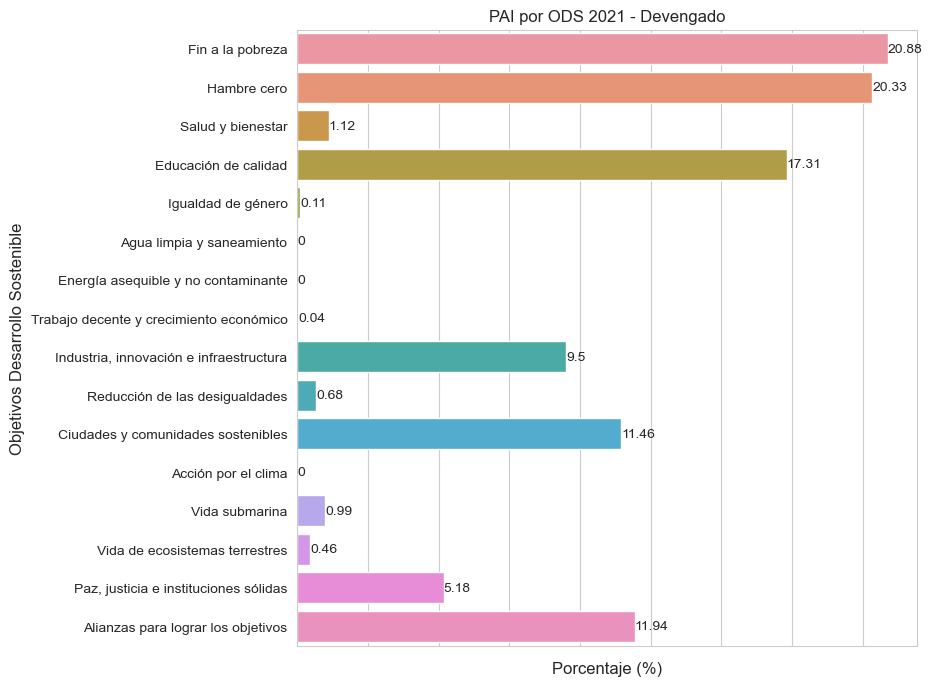

In [37]:
plt.rcParams['figure.figsize'] = [8, 8]
sns.set_style("whitegrid")

ax = sns.barplot(x='percent_dev', y='name', data=data_4b_)

for i in ax.containers:
    ax.bar_label(i,size=10)

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("PAI por ODS %s - Devengado" % (year))

ax.set_ylabel("Objetivos Desarrollo Sostenible", fontsize = 12)
ax.set_xlabel("Porcentaje (%)", fontsize = 12)

#legend = ax.legend()
#legend.texts[0].set_text("ODS")
#legend.texts[1].set_text("No ODS")


In [38]:
data_4d = data_4.groupby(['Obj', 'Meta', 'BestOpt_Label', 'Fuente']).agg({'Codificado':'sum', 'Devengado':'sum', 'unique_code':'count'}).reset_index()
data_4d = data_4d.loc[data_4d['BestOpt_Label'] != 'N/A']

data_4d_ = data_4d.groupby(['Obj', 'Fuente']).agg({'Codificado':'sum', 'Devengado':'sum', 'unique_code':'sum'}).reset_index()

data_4d_ = pd.merge(data_4d_, ODS_names, how='left', on='Obj')


data_4d_1 = data_4d_.loc[data_4d_['Obj'] == "1"]
data_4d_1 = data_4d_1[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_1 = pd.melt(data_4d_1, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_1['value'] = data_4d_1['value']/1000000
data_4d_1['Percent'] = (data_4d_1['value'] * 100 / data_4d_1.groupby('variable')['value'].transform('sum')).round(1)

data_4d_2 = data_4d_.loc[data_4d_['Obj'] == "2"]
data_4d_2 = data_4d_2[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_2 = pd.melt(data_4d_2, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_2['value'] = data_4d_2['value']/1000000
data_4d_2['Percent'] = (data_4d_2['value'] * 100 / data_4d_2.groupby('variable')['value'].transform('sum')).round(1)

data_4d_3 = data_4d_.loc[data_4d_['Obj'] == "3"]
data_4d_3 = data_4d_3[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_3 = pd.melt(data_4d_3, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_3['value'] = data_4d_3['value']/1000000
data_4d_3['Percent'] = (data_4d_3['value'] * 100 / data_4d_3.groupby('variable')['value'].transform('sum')).round(1)

data_4d_4 = data_4d_.loc[data_4d_['Obj'] == "4"]
data_4d_4 = data_4d_4[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_4 = pd.melt(data_4d_4, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_4['value'] = data_4d_4['value']/1000000
data_4d_4['Percent'] = (data_4d_4['value'] * 100 / data_4d_4.groupby('variable')['value'].transform('sum')).round(1)

data_4d_5 = data_4d_.loc[data_4d_['Obj'] == "5"]
data_4d_5 = data_4d_5[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_5 = pd.melt(data_4d_5, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_5['value'] = data_4d_5['value']/1000000
data_4d_5['Percent'] = (data_4d_5['value'] * 100 / data_4d_5.groupby('variable')['value'].transform('sum')).round(1)

data_4d_6 = data_4d_.loc[data_4d_['Obj'] == "6"]
data_4d_6 = data_4d_6[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_6 = pd.melt(data_4d_6, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_6['value'] = data_4d_6['value']/1000000
data_4d_6['Percent'] = (data_4d_6['value'] * 100 / data_4d_6.groupby('variable')['value'].transform('sum')).round(1)

data_4d_7 = data_4d_.loc[data_4d_['Obj'] == "7"]
data_4d_7 = data_4d_7[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_7 = pd.melt(data_4d_7, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_7['value'] = data_4d_7['value']/1000000
data_4d_7['Percent'] = (data_4d_7['value'] * 100 / data_4d_7.groupby('variable')['value'].transform('sum')).round(1)

data_4d_8 = data_4d_.loc[data_4d_['Obj'] == "8"]
data_4d_8 = data_4d_8[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_8 = pd.melt(data_4d_8, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_8['value'] = data_4d_8['value']/1000000
data_4d_8['Percent'] = (data_4d_8['value'] * 100 / data_4d_8.groupby('variable')['value'].transform('sum')).round(1)

data_4d_9 = data_4d_.loc[data_4d_['Obj'] == "9"]
data_4d_9 = data_4d_9[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_9 = pd.melt(data_4d_9, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_9['value'] = data_4d_9['value']/1000000
data_4d_9['Percent'] = (data_4d_9['value'] * 100 / data_4d_9.groupby('variable')['value'].transform('sum')).round(1)

data_4d_10 = data_4d_.loc[data_4d_['Obj'] == "10"]
data_4d_10 = data_4d_10[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_10 = pd.melt(data_4d_10, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_10['value'] = data_4d_10['value']/1000000
data_4d_10['Percent'] = (data_4d_10['value'] * 100 / data_4d_10.groupby('variable')['value'].transform('sum')).round(1)

data_4d_11 = data_4d_.loc[data_4d_['Obj'] == "11"]
data_4d_11 = data_4d_11[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_11 = pd.melt(data_4d_11, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_11['value'] = data_4d_11['value']/1000000
data_4d_11['Percent'] = (data_4d_11['value'] * 100 / data_4d_11.groupby('variable')['value'].transform('sum')).round(1)

data_4d_12 = data_4d_.loc[data_4d_['Obj'] == "12"]
data_4d_12 = data_4d_12[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_12 = pd.melt(data_4d_12, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_12['value'] = data_4d_12['value']/1000000
data_4d_12['Percent'] = (data_4d_12['value'] * 100 / data_4d_12.groupby('variable')['value'].transform('sum')).round(1)

data_4d_13 = data_4d_.loc[data_4d_['Obj'] == "13"]
data_4d_13 = data_4d_13[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_13 = pd.melt(data_4d_13, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_13['value'] = data_4d_13['value']/1000000
data_4d_13['Percent'] = (data_4d_13['value'] * 100 / data_4d_13.groupby('variable')['value'].transform('sum')).round(1)

data_4d_14 = data_4d_.loc[data_4d_['Obj'] == "14"]
data_4d_14 = data_4d_14[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_14 = pd.melt(data_4d_14, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_14['value'] = data_4d_14['value']/1000000
data_4d_14['Percent'] = (data_4d_14['value'] * 100 / data_4d_14.groupby('variable')['value'].transform('sum')).round(1)

data_4d_15 = data_4d_.loc[data_4d_['Obj'] == "15"]
data_4d_15 = data_4d_15[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_15 = pd.melt(data_4d_15, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_15['value'] = data_4d_15['value']/1000000
data_4d_15['Percent'] = (data_4d_15['value'] * 100 / data_4d_15.groupby('variable')['value'].transform('sum')).round(1)

data_4d_16 = data_4d_.loc[data_4d_['Obj'] == "16"]
data_4d_16 = data_4d_16[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_16 = pd.melt(data_4d_16, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_16['value'] = data_4d_16['value']/1000000
data_4d_16['Percent'] = (data_4d_16['value'] * 100 / data_4d_16.groupby('variable')['value'].transform('sum')).round(1)

data_4d_17 = data_4d_.loc[data_4d_['Obj'] == "17"]
data_4d_17 = data_4d_17[["Obj", "Fuente", "Codificado", "Devengado"]]
data_4d_17 = pd.melt(data_4d_17, id_vars=['Obj', 'Fuente'], value_vars=['Codificado', 'Devengado'])
data_4d_17['value'] = data_4d_17['value']
data_4d_17['Percent'] = (data_4d_17['value'] * 100 / data_4d_17.groupby('variable')['value'].transform('sum')).round(1)


In [67]:
data_4d_17

,Obj,Fuente,variable,value,Percent
2,17,Prestamos Externos,Codificado,2.828676e+09,99.8
8,17,Prestamos Externos,Devengado,5.386355e+08,99.8
0,17,Asistencia Técnica Y Donaciones,Codificado,2.212879e+06,0.1
1,17,Colocaciones Externas,Codificado,2.158340e+06,0.1
3,17,Recursos Fiscales,Codificado,1.704529e+06,0.1
9,17,Recursos Fiscales,Devengado,6.255600e+05,0.1
6,17,Asistencia Técnica Y Donaciones,Devengado,4.188922e+05,0.1
4,17,Recursos Fiscales Generados Por Las Instituc...,Codificado,1.811300e+05,0.0
5,17,Recursos Provenientes De Preasignaciones,Codificado,0.000000e+00,0.0
7,17,Colocaciones Externas,Devengado,0.000000e+00,0.0


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/2844176481.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


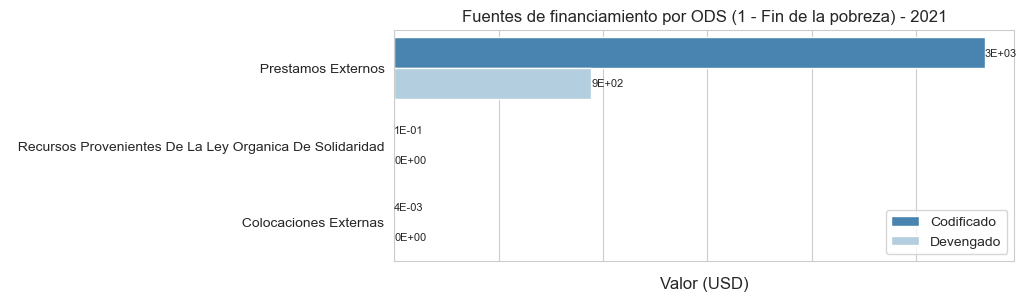

In [39]:
data_4d_1 = data_4d_1.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 3]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_1, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (1 - Fin de la pobreza) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/2003586910.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


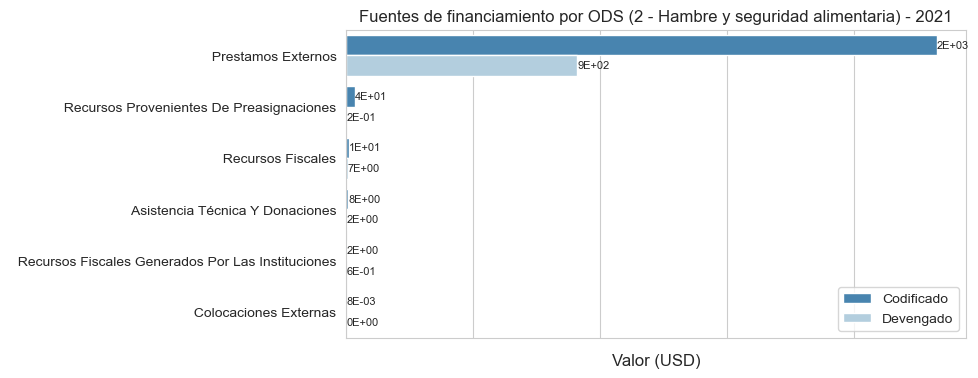

In [40]:
data_4d_2 = data_4d_2.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_2, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (2 - Hambre y seguridad alimentaria) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/3939579519.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


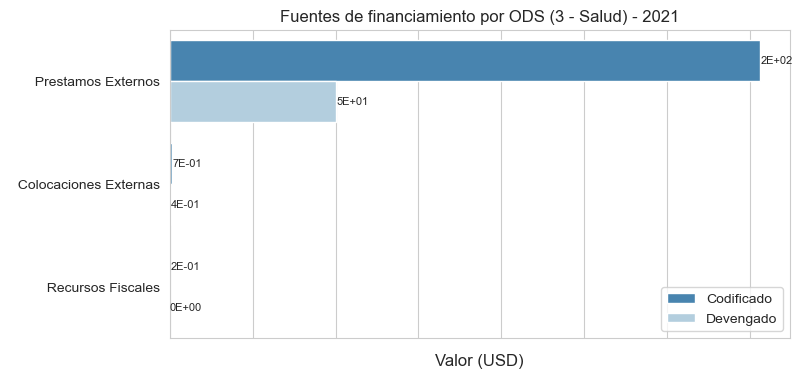

In [41]:
data_4d_3 = data_4d_3.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_3, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (3 - Salud) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/3366907159.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


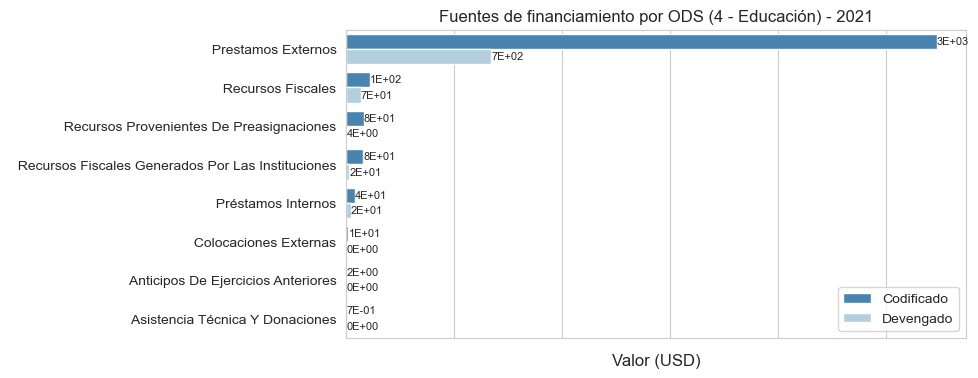

In [42]:
data_4d_4 = data_4d_4.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_4, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (4 - Educación) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/201783619.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


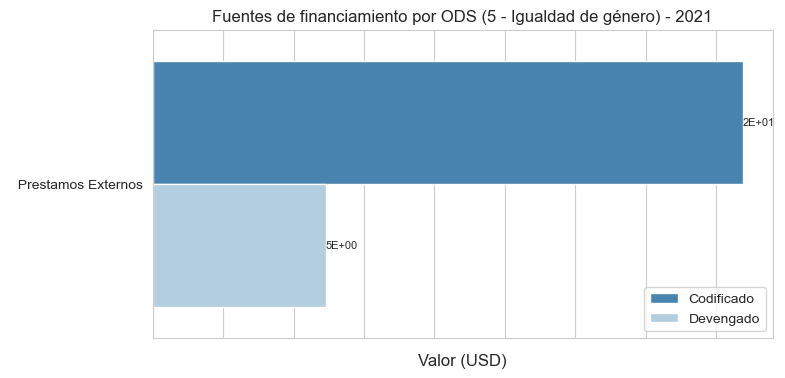

In [43]:
data_4d_5 = data_4d_5.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_5, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (5 - Igualdad de género) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/2718099921.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


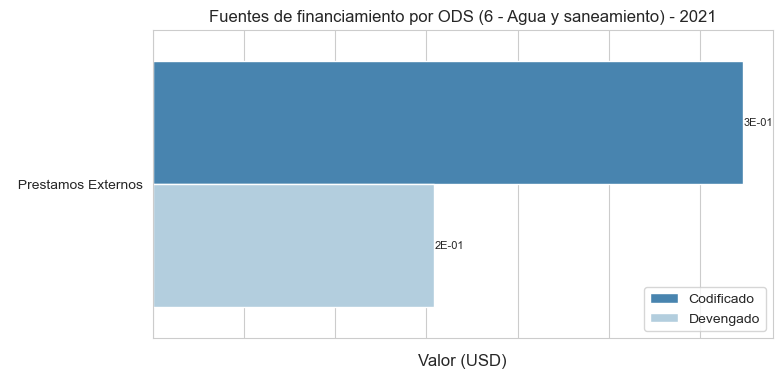

In [44]:
data_4d_6 = data_4d_6.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_6, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (6 - Agua y saneamiento) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/3427887756.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


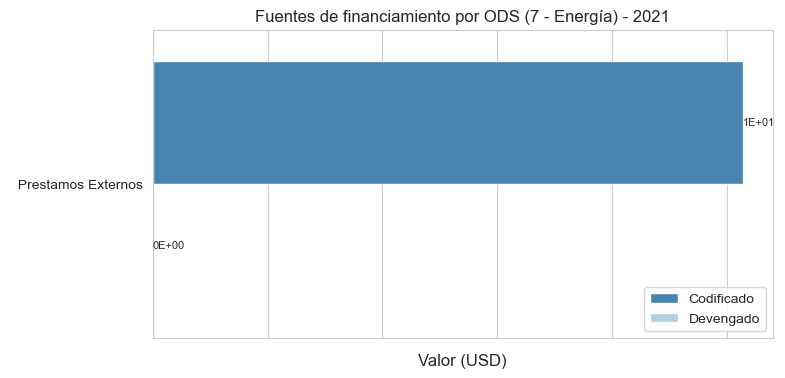

In [45]:
data_4d_7 = data_4d_7.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_7, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (7 - Energía) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/3586989228.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


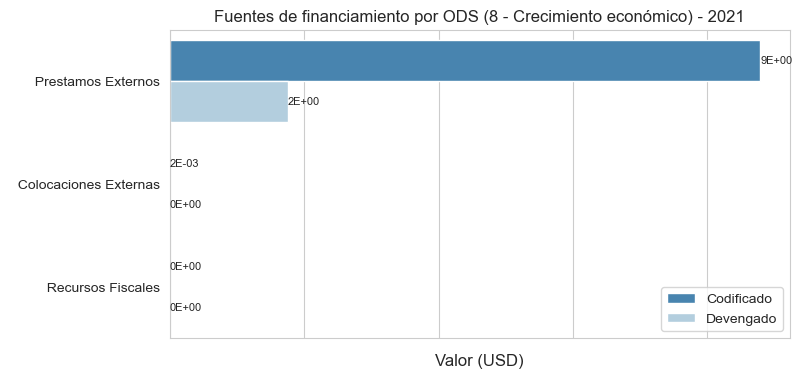

In [46]:
data_4d_8 = data_4d_8.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_8, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (8 - Crecimiento económico) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1282041911.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


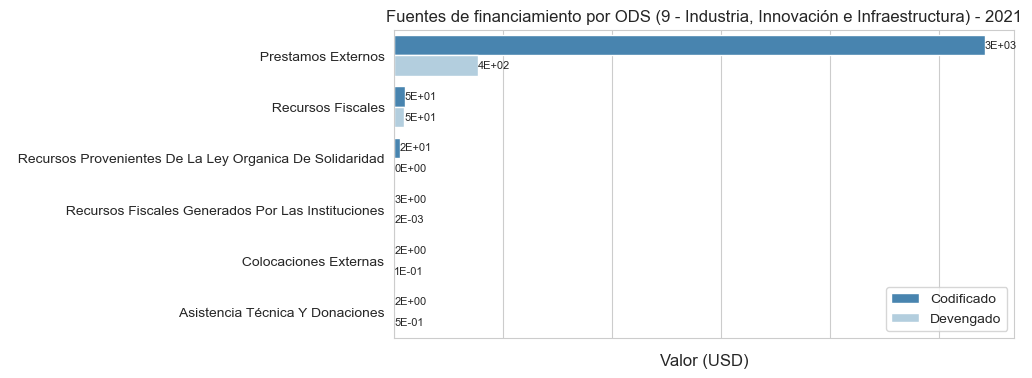

In [47]:
data_4d_9 = data_4d_9.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_9, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (9 - Industria, Innovación e Infraestructura) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1024111838.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


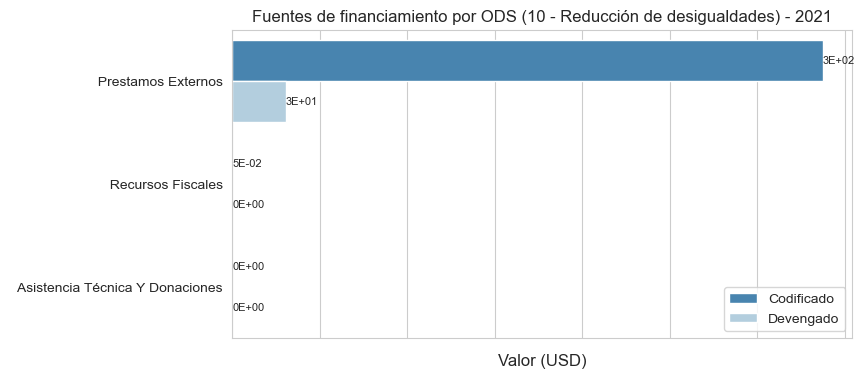

In [48]:
data_4d_10 = data_4d_10.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_10, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (10 - Reducción de desigualdades) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1992905596.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


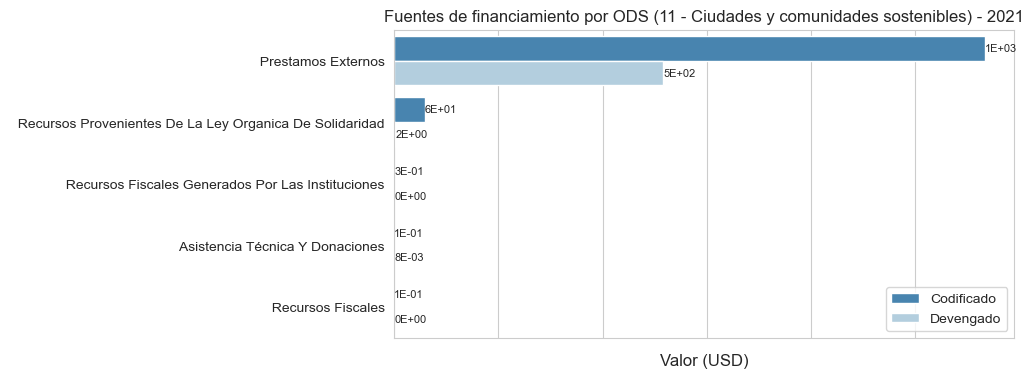

In [49]:
data_4d_11 = data_4d_11.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_11, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (11 - Ciudades y comunidades sostenibles) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


In [50]:
data_4d_12

,Obj,Fuente,variable,value,Percent


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/1118524573.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


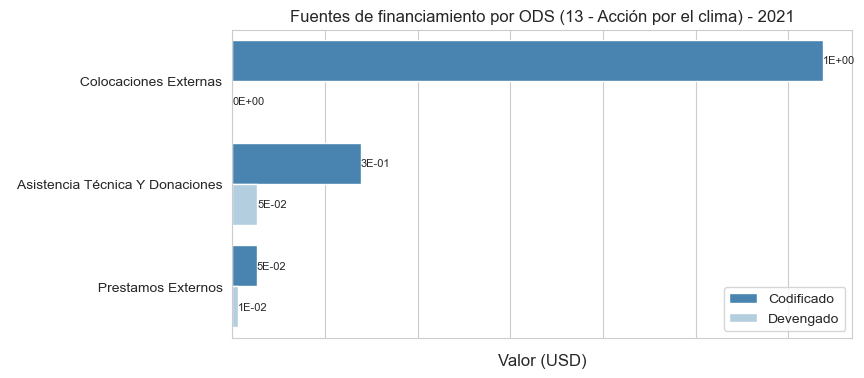

In [51]:
data_4d_13 = data_4d_13.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_13, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (13 - Acción por el clima) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/3657589312.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


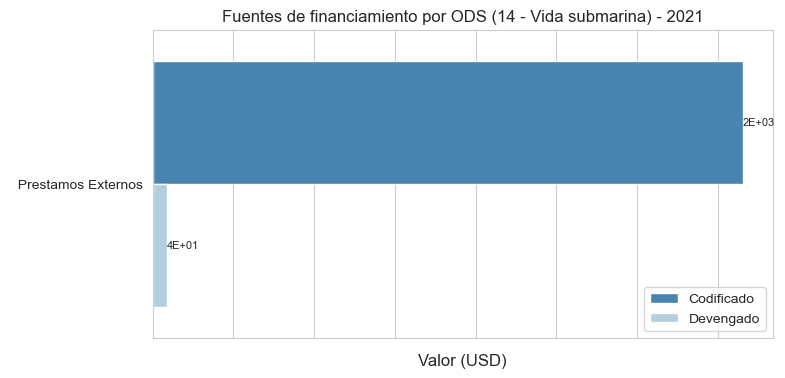

In [52]:
data_4d_14 = data_4d_14.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_14, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (14 - Vida submarina) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/583857824.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


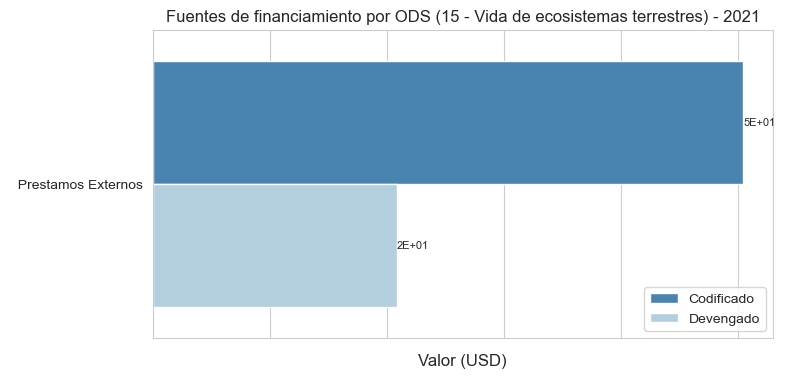

In [53]:
data_4d_15 = data_4d_15.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_15, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (15 - Vida de ecosistemas terrestres) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/4102526337.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


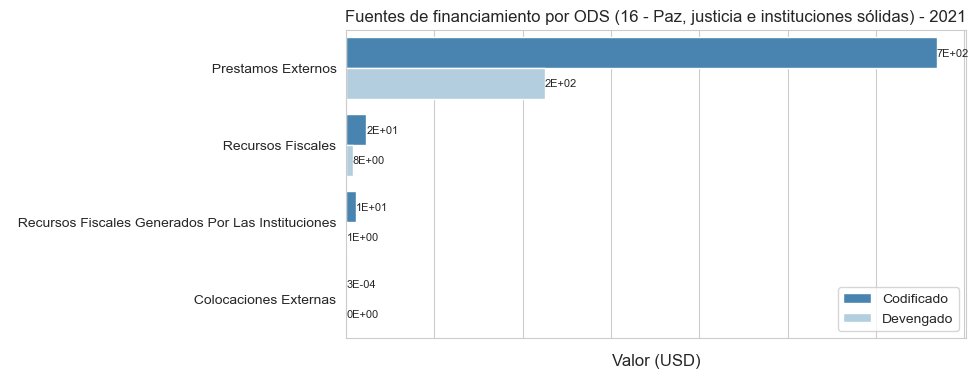

In [54]:
data_4d_16 = data_4d_16.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_16, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (16 - Paz, justicia e instituciones sólidas) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])


/var/folders/33/60y9t0rs36zds7q6w6w6wkhm0000gn/T/ipykernel_25553/4226984022.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels())


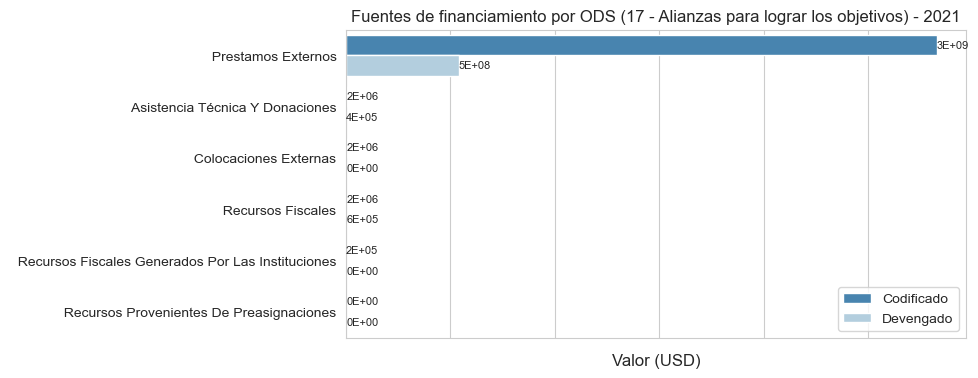

In [55]:
data_4d_17 = data_4d_17.sort_values(by='value', ascending = False)

plt.rcParams['figure.figsize'] = [8, 4]
sns.set_style("whitegrid")

ax = sns.barplot(x='value', y='Fuente', hue = 'variable', data=data_4d_17, ci = None, palette='Blues_r')

for container in ax.containers:
    ax.bar_label(container, size=8,fmt='%.0E')

ax.set_xticklabels(ax.get_xticklabels())
ax.set_title("Fuentes de financiamiento por ODS (17 - Alianzas para lograr los objetivos) - %s" % (year))

ax.set_ylabel("", fontsize = 12)
ax.set_xlabel("Valor (USD)", fontsize = 12)

legend = ax.legend(loc='lower right', labels=['Codificado', 'Devengado'])
